In [1]:
import numpy as np

a = np.load('./loss_eval/loss_f2.npy')  # 배치 16으로 줄이고 스케줄러 장착, mse, sim, mr = 2, 1, 1
a

array([47.84996796, 41.26008987, 32.50087357, ...,  1.33990073,
        0.82768011,  0.13132414])

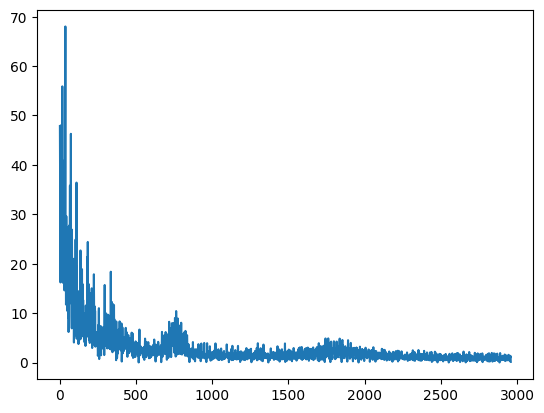

In [3]:
from matplotlib import pyplot as plt

plt.plot(range(a.shape[0]),a)
plt.show()


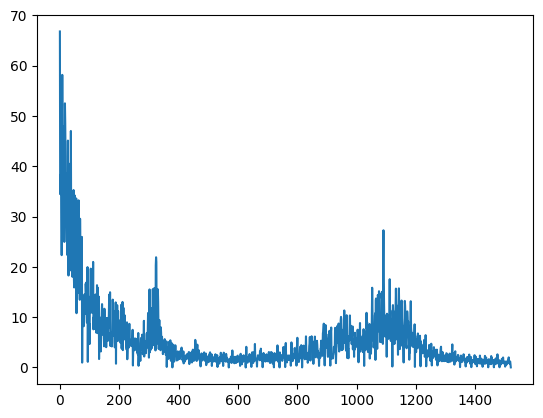

In [4]:
import numpy as np
from matplotlib import pyplot as plt

a = np.load('./loss_eval/loss_f1.npy')

plt.plot(range(a.shape[0]),a)
plt.show()


In [1]:
import pandas as pd

df = pd.read_excel('./datatouch/essayset8_ex.xlsx',index_col=0)
df

,text,score
id,,
20716,A long time ago when I was in third grade I h...,34
20717,Softball has to be one of the single most gre...,46
20718,"Some people like making people laugh, I love ...",40
20719,"""LAUGHTER"" @CAPS1 I hang out with my friends...",30
20721,Well ima tell a story about the time i got @CA...,26
...,...,...
21626,In most stories mothers and daughters are eit...,35
21628,I never understood the meaning laughter is th...,32
21629,"When you laugh, is @CAPS5 out of habit, or is ...",40


In [4]:
df.score.mean()

36.95020746887967

In [10]:
df.score.value_counts()

40    161
36     65
30     49
35     47
37     39
34     39
32     37
31     34
33     32
45     31
42     23
41     22
38     20
43     15
44     14
50     13
46     13
28     11
29      8
39      8
47      7
27      6
25      5
26      4
20      4
48      3
24      3
55      2
49      2
21      2
10      1
15      1
22      1
60      1
Name: score, dtype: int64

In [2]:
import torch
a = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.int)
b = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.int)
torch.add(a,b)
# 원소별 덧셈

tensor([[ 2,  4,  6],
        [ 8, 10, 12]], dtype=torch.int32)

In [20]:
a = torch.tensor([[1,2,3,4],[2,3,4,5]])
torch.tensor(range(a.shape[0]))

tensor([0, 1])

In [23]:
a.shape[0],a.size(0)

(2, 2)

In [41]:
import torch.nn as nn
cos  = nn.CosineSimilarity(dim=0,eps=1e-6)
a = torch.tensor([1,2,3],dtype=torch.float32)
b = torch.tensor([2,4,7],dtype=torch.float32)
cos(a,b)

tensor(0.9974)

In [44]:
torch.max(torch.tensor([1,2,3]))

tensor(3)

In [39]:
a = torch.tensor([[[1,2,3],[2,3,4]]])
b = torch.tensor(0)
a[b].squeeze(dim=1)

tensor([[1, 2, 3],
        [2, 3, 4]])

In [10]:

a[1][2],a[torch.tensor(1)]

(tensor(4), tensor([2, 3, 4, 5]))

In [17]:
import numpy as np 

a = np.array([1,2,3])
np.random.choice(a)

3

In [19]:
a = np.array([1,2,3])
b= np.array(4)
b in a

False